In [1]:
import numpy as np
import matplotlib.pyplot as plt

[0.         0.01449275 0.02898551 0.04347826 0.05797101 0.07246377
 0.08695652 0.10144928 0.11594203 0.13043478 0.14492754 0.15942029
 0.17391304 0.1884058  0.20289855 0.2173913  0.23188406 0.24637681
 0.26086957 0.27536232 0.28985507 0.30434783 0.31884058 0.33333333
 0.34782609 0.36231884 0.37681159 0.39130435 0.4057971  0.42028986
 0.43478261 0.44927536 0.46376812 0.47826087 0.49275362 0.50724638
 0.52173913 0.53623188 0.55072464 0.56521739 0.57971014 0.5942029
 0.60869565 0.62318841 0.63768116 0.65217391 0.66666667 0.68115942
 0.69565217 0.71014493 0.72463768 0.73913043 0.75362319 0.76811594
 0.7826087  0.79710145 0.8115942  0.82608696 0.84057971 0.85507246
 0.86956522 0.88405797 0.89855072 0.91304348 0.92753623 0.94202899
 0.95652174 0.97101449 0.98550725 1.        ]


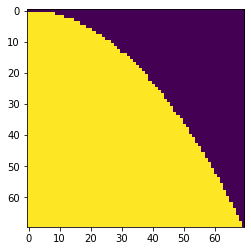

In [58]:
num_points = 70
x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)
print(x)
def bool_domain_gen(x, y, num_points):
    x_g, y_g = np.meshgrid(x, np.sqrt(1-y))
    y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

bool_domain = bool_domain_gen(x, y, num_points)

plt.figure(figsize = (4,4))
plt.imshow(bool_domain)

In [157]:
from math import floor

def domain(M):
    h = 1/M

    x = np.linspace(0,1,M+1)
    y = np.linspace(0,1,M+1)
    P = (np.sqrt(1-y)//h).astype(int)
    return P

print(domain(7))

def projection(M, r): 
#   r is the value of stepsize h = 1/M and k = r*h

[7 6 5 5 4 3 2 0]


In [167]:
def normal_dirichlet(boundaries):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    l, r, b = boundaries
    M = l.shape[0] - 1         # l is M+1
    G = np.zeros((M-1, M-1))
    G[0, :] += np.insert(b[M-1: 1: -1], 0, 0)
    G[:, 0] += l[1:M]

    return G.flatten()

# Testing
M = 10
l = np.arange(M+1)
b = np.arange(M+1)


g2 = normal_dirichlet([l, r, b])
#G = np.flip(g2.reshape((M-1,M-1)), 0)
print(np.flip(g2.reshape((M-1,M-1)), 0))


[[9. 0. 0. 0. 0. 0. 0. 0. 0.]
 [8. 0. 0. 0. 0. 0. 0. 0. 0.]
 [7. 0. 0. 0. 0. 0. 0. 0. 0.]
 [6. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 9. 8. 7. 6. 5. 4. 3. 2.]]


16.0
ah:3


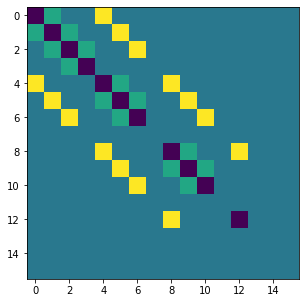

In [146]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

def triblock_mod(C, B, M, zerolist):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1,1], [-1, 1], M-1), B)
    if np.size(A) != len(zerolist)**4:
        print("np.size(A) != len(zerolist)")
    for i in range(len(zerolist)):
        A[(i*(len(zerolist))+zerolist[i]):(i+1)*(len(zerolist)), :] = 0
    print(np.sqrt(np.size(A)))
    for i in range(len(zerolist)**2):
        if A[i,i] != 0:
            if A[i+1,i+1] == 0:
                A[i,i+1] = 0
            if i < len(zerolist)**2 - len(zerolist):
                if A[i+len(zerolist),i+len(zerolist)] == 0:
                    A[i, i+len(zerolist)] = 0
    return A

# Testing
M = 5
C = ndiag([1,-2,1], [-1,0,1], (M-1))
B = 3 * np.eye(M-1)
A = triblock_mod(C, B, M, [4,3,3,1])
print("ah:"+str(len([3,2,1])))
plt.figure(0, figsize = (5,5))
plt.imshow(A)
plt.show()